# Retention Project Εxploritory Data Analysis Workbook

## Questions beyond the data

- Does data account for major changes? 
- Which students were fall to fall and spring to spring?
- How to account for students who skip a semester (Counted as not retained but returned the following semester)?
- How to make each student a single row and seperate students into subsamples?


In [1]:
# Import for Data Manipulation
import pandas as pd
import numpy as np 

# Import for Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
import squarify

# Import for data acquisition and prep
import wrangle

# Import for Scaling and Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Import for hypothesis testing
from scipy import stats

# Import for Classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import for analysis of classification models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import for Clustering
from sklearn.cluster import KMeans

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set to see all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
# Test Functions
students, sparce_dummies = wrangle.prep_student_data(wrangle.acquire_student_data())
students.head()

,id,retained,enrolled_between,race_ethn,sex,time_status,fgen,student_year,pell_ever,term_gpa,enroll_type,cip,age_at_start_term,act,academic_standing,fa_recd,depend_status,w_count,yrs_since_start,reg_before_start,title,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,title_agricultural/animal/plant/veterinary_science_and_related_fields,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_basic_skills_and_developmental/remedial_education,title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_military_technologies_and_applied_sciences,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
0,356453,1,1,White,1,1,1GX,SO,0,2.000000,TRANSFER,24,19-22,NADA,1,0,unk,0,1,89,"liberal_arts_and_sciences,_general_studies_and_humanities",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,876229,0,0,Hispanic,0,1,1GN,FR,1,0.462308,FIRST,11,19-22,20 or more,0,1,DEP,0,0,15,computer_and_information_sciences_and_support_services,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,476074,1,0,White,1,1,1GY,SE,1,3.500625,TRANSFER,26,19-22,20 or more,1,1,DEP,0,3,97,biological_and_biomedical_sciences,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,818465,1,0,White,1,1,1GY,SE,1,3.562500,FIRST,52,23-29,20 or more,1,1,IND,0,5,91,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
4,973275,1,1,White,1,1,1GN,SO,0,3.333333,TRANSFER,52,19-22,20 or more,1,1,DEP,0,1,156,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [3]:
# Split Data for further exploration
target = 'retained'
train, validate, test = wrangle.split_data(students, target)
train.head()

,id,retained,enrolled_between,race_ethn,sex,time_status,fgen,student_year,pell_ever,term_gpa,enroll_type,cip,age_at_start_term,act,academic_standing,fa_recd,depend_status,w_count,yrs_since_start,reg_before_start,title,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,title_agricultural/animal/plant/veterinary_science_and_related_fields,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_basic_skills_and_developmental/remedial_education,title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_military_technologies_and_applied_sciences,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
434221,607703,0,0,Two or more races,1,0,1GY,SO,1,1.222222,FIRST,26,23-29,Under 20,1,1,unk,0,6 or more,150,biological_and_biomedical_sciences,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
357083,1125873,1,1,White,1,0,1GY,SE,0,3.000000,TRANSFER,42,23-29,20 or more,1,0,unk,0,2,40,psychology,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
418485,593732,1,1,African American,1,0,1GY,JU,1,2.000000,FIRST,26,23-29,NADA,1,1,IND,0,6 or more,83,biological_and_biomedical_sciences,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
178811,934538,1,1,White,1,0,1GY,SE,1,4.000000,TRANSFER,13,30-older,NADA,1,1,IND,0,4,68,education,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
100114,991406,1,1,Hispanic,0,1,1GY,FR,1,2.556667,FIRST,54,18-younger,Under 20,1,1,DEP,0,1,83,history,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [4]:
# Scale data
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train,validate,test)
train_scaled.head()

,reg_before_start,term_gpa
434221,0.898204,0.305556
357083,0.239521,0.750000
418485,0.497006,0.500000
178811,0.407186,1.000000
100114,0.497006,0.639167


# TODO

- Reassess all EDA

- Ask more questions for year over year retention (Not accounting for individual students)

- stacked bar chart showing percent of overall population for area of study with its retention stacked

- Comparing subgroups to overall retention by scaling smaller groups up and see how it affects over all retention

- Rank values by their Retention percentage (feature? or dimensionality reduction? (regularization?))

# Initial EDA

## Addressing unique students ID

In [5]:
students['id'].nunique()

115863

In [6]:
len(students)

448086

In [10]:
#[students['id'].value_counts() == 1]

In [8]:
students.head()

,id,retained,enrolled_between,race_ethn,sex,time_status,fgen,student_year,pell_ever,term_gpa,enroll_type,cip,age_at_start_term,act,academic_standing,fa_recd,depend_status,w_count,yrs_since_start,reg_before_start,title,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,title_agricultural/animal/plant/veterinary_science_and_related_fields,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_basic_skills_and_developmental/remedial_education,title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_military_technologies_and_applied_sciences,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
0,356453,1,1,White,1,1,1GX,SO,0,2.000000,TRANSFER,24,19-22,NADA,1,0,unk,0,1,89,"liberal_arts_and_sciences,_general_studies_and_humanities",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,876229,0,0,Hispanic,0,1,1GN,FR,1,0.462308,FIRST,11,19-22,20 or more,0,1,DEP,0,0,15,computer_and_information_sciences_and_support_services,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,476074,1,0,White,1,1,1GY,SE,1,3.500625,TRANSFER,26,19-22,20 or more,1,1,DEP,0,3,97,biological_and_biomedical_sciences,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,818465,1,0,White,1,1,1GY,SE,1,3.562500,FIRST,52,23-29,20 or more,1,1,IND,0,5,91,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
4,973275,1,1,White,1,1,1GN,SO,0,3.333333,TRANSFER,52,19-22,20 or more,1,1,DEP,0,1,156,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [11]:
student_zero = train[train['id'] == 459725]
student_zero

,id,retained,enrolled_between,race_ethn,sex,time_status,fgen,student_year,pell_ever,term_gpa,enroll_type,cip,age_at_start_term,act,academic_standing,fa_recd,depend_status,w_count,yrs_since_start,reg_before_start,title,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,title_agricultural/animal/plant/veterinary_science_and_related_fields,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_basic_skills_and_developmental/remedial_education,title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_military_technologies_and_applied_sciences,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
167356,459725,1,1,White,0,0,1GN,SE,1,2.500000,FIRST,52,23-29,Under 20,1,1,IND,0,5,147,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
244196,459725,0,1,White,0,0,1GN,SE,1,1.666667,FIRST,52,23-29,Under 20,1,1,IND,0,6 or more,72,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
399672,459725,1,1,White,0,1,1GN,SO,1,2.917500,FIRST,52,19-22,Under 20,1,1,DEP,0,3,36,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
320733,459725,1,1,White,0,0,1GN,SE,1,3.000000,FIRST,52,23-29,Under 20,1,1,IND,0,6 or more,114,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
175829,459725,1,1,White,0,1,1GN,FR,1,3.500000,FIRST,11,19-22,Under 20,1,1,DEP,0,0,104,computer_and_information_sciences_and_support_services,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
30214,459725,1,1,White,0,1,1GN,JU,1,2.890000,FIRST,52,23-29,Under 20,1,1,IND,1,4,118,"business,_management,_marketing,_and_related_support_services",0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
313131,459725,1,1,White,0,0,1GN,JU,1,2.000

In [13]:
student_zero[['enrolled_between','time_status','student_year','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
.sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

,enrolled_between,time_status,student_year,term_gpa,cip,age_at_start_term,depend_status,w_count,yrs_since_start,reg_before_start
175829,1,1,FR,3.500000,11,19-22,DEP,0,0,104
340198,1,1,FR,3.333333,11,19-22,DEP,0,1,58
313131,1,0,JU,2.000000,52,23-29,DEP,0,3,57
30214,1,1,JU,2.890000,52,23-29,IND,1,4,118
260285,1,0,JU,3.000000,52,23-29,IND,0,5,77
167356,1,0,SE,2.500000,52,23-29,IND,0,5,147
244196,1,0,SE,1.666667,52,23-29,IND,0,6 or more,72
320733,1,0,SE,3.000000,52,23-29,IND,0,6 or more,114
399672,1,1,SO,2.917500,52,19-22,DEP,0,3,36


In [17]:
freshman = students[students['student_year'] =='FR']

In [18]:
freshman['id'].nunique()

59632

In [23]:
# freshman['id'].value_counts()

In [20]:
freshman_zero = freshman[freshman['id'] == 508071]

In [21]:
freshman_zero

,id,retained,enrolled_between,race_ethn,sex,time_status,fgen,student_year,pell_ever,term_gpa,enroll_type,cip,age_at_start_term,act,academic_standing,fa_recd,depend_status,w_count,yrs_since_start,reg_before_start,title,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,title_agricultural/animal/plant/veterinary_science_and_related_fields,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_basic_skills_and_developmental/remedial_education,title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_military_technologies_and_applied_sciences,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
28452,508071,1,0,African American,0,0,1GY,FR,1,0.670,FIRST,51,23-29,Under 20,1,1,IND,1,6 or more,156,health_professions_and_related_programs,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
33435,508071,1,1,African American,0,0,1GY,FR,1,3.670,FIRST,16,23-29,Under 20,1,0,DEP,0,5,10,"foreign_languages,_literatures,_and_linguistics",1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
45619,508071,1,1,African American,0,0,1GY,FR,1,3.335,FIRST,16,23-29,Under 20,1,0,DEP,0,4,33,"foreign_languages,_literatures,_and_linguistics",1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
77857,508071,0,0,African American,0,0,1GY,FR,1,0.000,FIRST,26,19-22,Under 20,1,0,DEP,0,2,42,biological_and_biomedical_sciences,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
97929,508071,1,1,African American,0,0,1GY,FR,1,3.000,FIRST,26,19-22,Under 20,1,1,DEP,0,0,70,biological_and_biomedical_sciences,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
98832,508071,1,1,African American,0,0,1GY,FR,1,1.670,FIRST,51,23-29,Under 20,1,1,IND,0,5,16,health_professions_and_related_programs,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
107186,508071,0,1,African American,0,0,1GY,FR,1,2.000,FIRST,51,23-29,Under 20,1,1,IND,0,6 or more,157,health_professions_and_related_pr

In [24]:
freshman_zero[['retained','enrolled_between','time_status','student_year','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
.sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

,retained,enrolled_between,time_status,student_year,term_gpa,cip,age_at_start_term,depend_status,w_count,yrs_since_start,reg_before_start
97929,1,1,0,FR,3.000,26,19-22,DEP,0,0,70
140999,1,1,0,FR,3.000,26,19-22,DEP,0,1,133
227652,1,1,0,FR,0.000,26,19-22,DEP,0,1,58
77857,0,0,0,FR,0.000,26,19-22,DEP,0,2,42
285992,0,1,0,FR,2.000,26,19-22,DEP,0,2,52
377478,1,1,0,FR,1.670,16,19-22,DEP,0,4,32
45619,1,1,0,FR,3.335,16,23-29,DEP,0,4,33
33435,1,1,0,FR,3.670,16,23-29,DEP,0,5,10
98832,1,1,0,FR,1.670,51,23-29,IND,0,5,16
28452,1,0,0,FR,0.670,51,23-29,IND,1,6 or more,156


In [25]:
students.id.value_counts().mean()

3.8673778514279795

## Summary of ID assessment
- Each individual row is considered an individual observation of retention year over a year based on variables provided. Individual students show up in dataset multiple times. So this is not a measure of whether an individual student is retained over time but a measure of individual instances of year over year retention. With more data provided and further exploration and analysis, more could be done to understand drivers of individual student retention.

## Univariate (students df used)

In [26]:
students.shape

(448086, 85)

- (448176, 22)

In [27]:
# students.describe(include='all')

- efc, hs_gpa, and term_gpa have missing data. efc has a suspicious max. 
- 1 key variable (id), 17 categorical, 4 continuous (efc,hs_gpa,term_gpa,reg_before_start)

In [28]:
# students.info()

In [29]:
# students.isnull().sum()

Missing
- efc: 128245
- hs_gpa: 247365
- term_gpa: 89

In [30]:
# students.isnull().mean()

Percent Missing
- efc: 0.286149 (Impute efc)
- hs_gpa: 0.551937 (Potentially drop hs_gpa)
- term_gpa: 0.000199 (Do not worry about term_gpa)

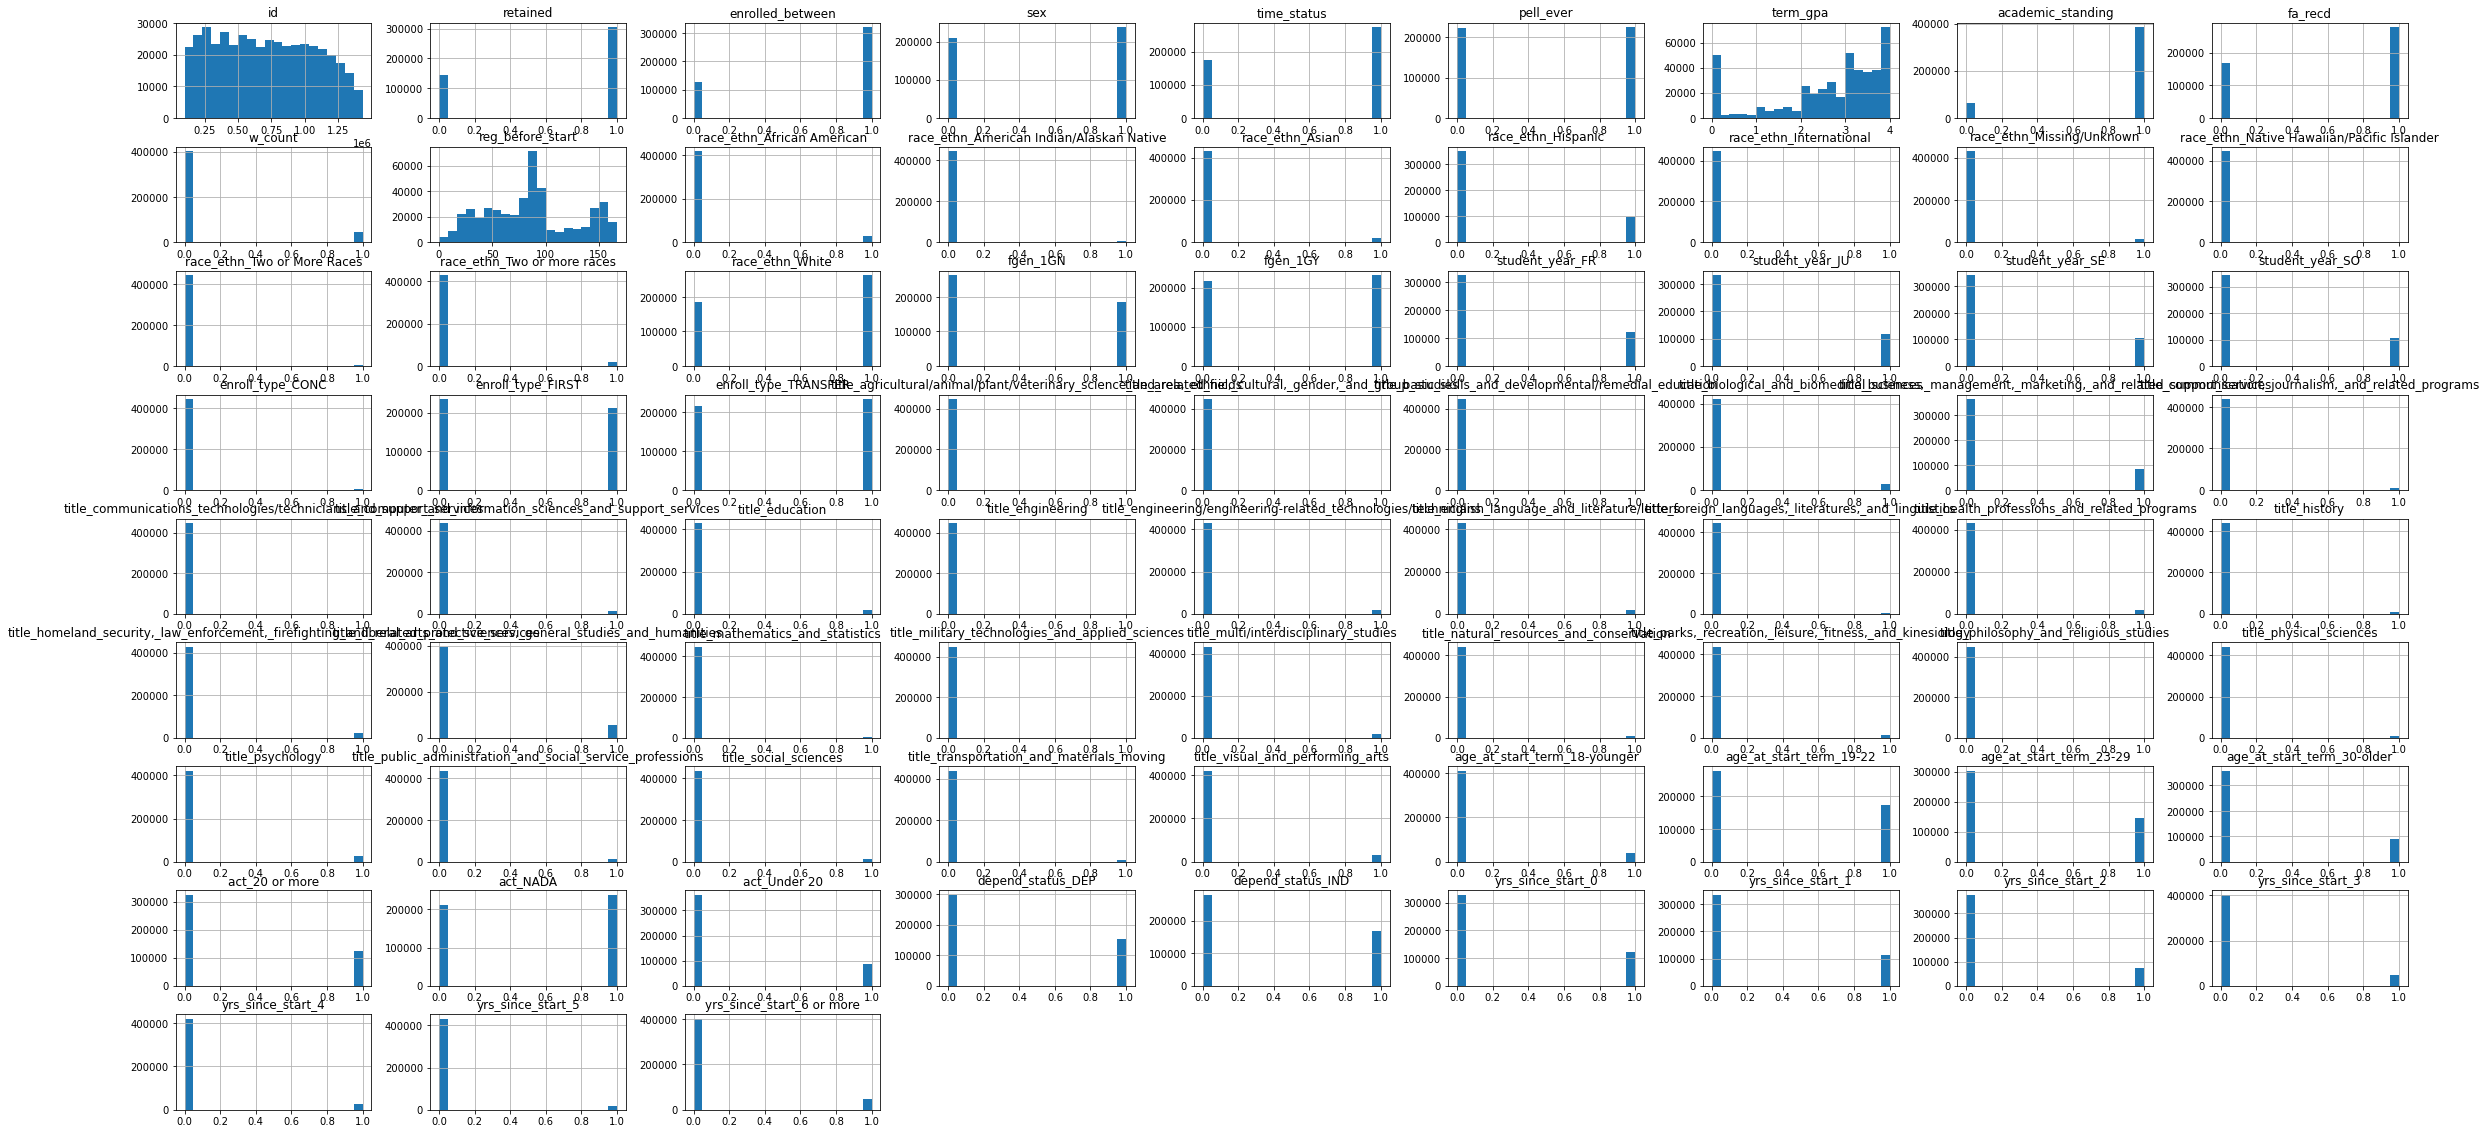

In [31]:
students.hist(figsize=(40,20), bins =20)
plt.show()

- Explore term_gpa: spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below.
- Explore reg_before_start: spike between 75 and 100, below 75 higher than above 100, 
        - external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature)
- hs_gpa shows a normal distribution around just below 3.0. Could be good for impute.
- efc looks suspect still

In [32]:
variables = students.columns[students.dtypes == 'object']

for col in variables:
    print(f'{col}\n\n\n{students[col].value_counts(dropna=False)}\n\n')

race_ethn


White                               263676
Hispanic                             96997
African American                     28147
Two or more races                    18238
Asian                                17760
Missing/Unknown                      16043
American Indian/Alaskan Native        2903
Two or More Races                     2151
International                         1405
Native Hawaiian/Pacific Islander       766
Name: race_ethn, dtype: int64


fgen


1GY    232156
1GN    184874
1GX     31056
Name: fgen, dtype: int64


student_year


FR    122967
JU    115323
SE    105466
SO    104330
Name: student_year, dtype: int64


enroll_type


TRANSFER    232940
FIRST       212915
CONC          2231
Name: enroll_type, dtype: int64


cip


52    84283
24    53784
50    29942
42    28328
26    27477
43    22258
13    19317
23    17899
15    17834
30    16912
51    16506
44    14714
31    14529
45    13595
11    11601
49    11208
54     9687
9      9549
40     8268
3      78

- One hot encode categorical columns
- Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
- Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_before_start

In [33]:
students.cip.value_counts(normalize = True)

52    0.188096
24    0.120031
50    0.066822
42    0.063220
26    0.061321
43    0.049674
13    0.043110
23    0.039945
15    0.039800
30    0.037743
51    0.036837
44    0.032837
31    0.032425
45    0.030340
11    0.025890
49    0.025013
54    0.021619
9     0.021311
40    0.018452
3     0.017628
27    0.009965
16    0.008945
38    0.003207
5     0.003198
14    0.002165
10    0.000353
1     0.000045
32    0.000007
29    0.000004
Name: cip, dtype: float64

- 52: almost 19% 
- 24: 12% 
- 50, 42, 26: 6%
- 43, 13, 23, 15, 30, 51, 44, 31, 45, 11, 49, 54, 9, 40, 3, 27 between 5% and 1%
- 16, 38, 5, 14, 10, 1, 32, 29 below 1$

## Univariate Summary:

- efc: 1/3 missing, suspicious max (impute?)
- hs_gpa: 55% missing, potentially drop, normal distribution possibly (impute or drop?)
- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)
- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)
- Change cip into major types and one hot encode
- Rank values by their Retention percentage (feature?)

##  Bivariate (Train df used)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250927 entries, 434221 to 185529
Data columns (total 85 columns):
 #   Column                                                                                  Non-Null Count   Dtype  
---  ------                                                                                  --------------   -----  
 0   id                                                                                      250927 non-null  int64  
 1   retained                                                                                250927 non-null  int64  
 2   enrolled_between                                                                        250927 non-null  int64  
 3   race_ethn                                                                               250927 non-null  object 
 4   sex                                                                                     250927 non-null  int64  
 5   time_status                                          

race_ethn

--------------------------------------------------------------
retained  race_ethn                       
1         White                               102129
0         White                                45492
1         Hispanic                             36703
0         Hispanic                             17628
1         African American                      9416
          Asian                                 7159
          Two or more races                     6778
0         African American                      6273
1         Missing/Unknown                       5798
0         Two or more races                     3493
          Missing/Unknown                       3194
          Asian                                 2793
1         American Indian/Alaskan Native        1004
          Two or More Races                      809
0         American Indian/Alaskan Native         643
1         International                          597
0         Two or More Races        

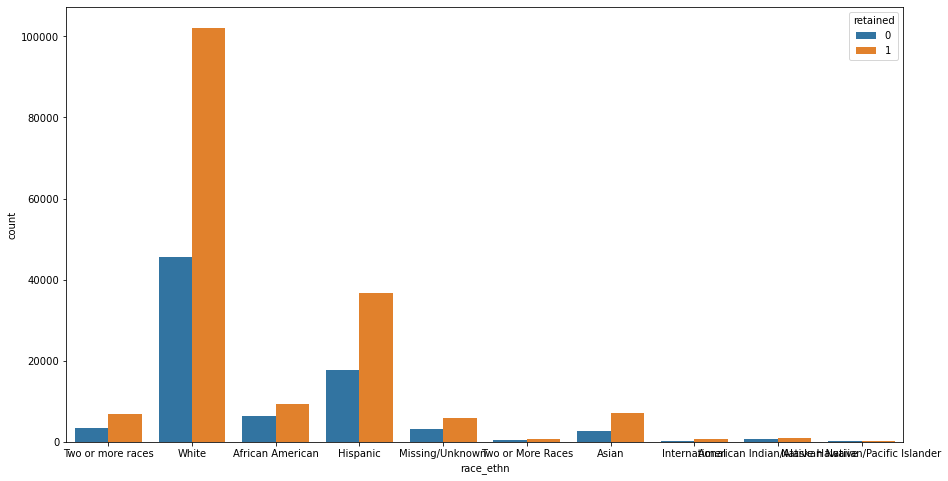

race_ethn                         retained
International                     1           0.757614
Asian                             1           0.719353
White                             1           0.691832
Hispanic                          1           0.675544
Two or More Races                 1           0.668043
Native Hawaiian/Pacific Islander  1           0.665882
Two or more races                 1           0.659916
Missing/Unknown                   1           0.644795
American Indian/Alaskan Native    1           0.609593
African American                  1           0.600166
                                  0           0.399834
American Indian/Alaskan Native    0           0.390407
Missing/Unknown                   0           0.355205
Two or more races                 0           0.340084
Native Hawaiian/Pacific Islander  0           0.334118
Two or More Races                 0           0.331957
Hispanic                          0           0.324456
White                 

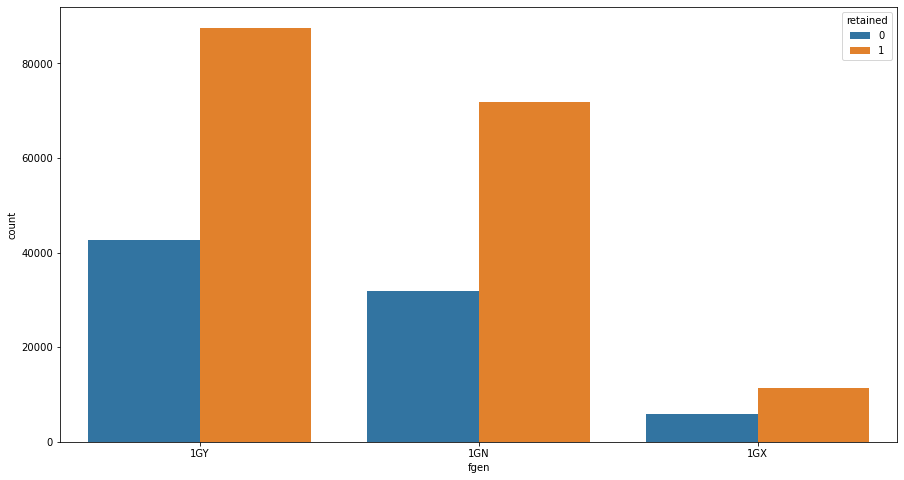

fgen  retained
1GN   1           0.692892
1GY   1           0.672760
1GX   1           0.659861
      0           0.340139
1GY   0           0.327240
1GN   0           0.307108
Name: retained, dtype: float64


student_year

--------------------------------------------------------------
retained  student_year
1         JU              51025
          SO              41546
          SE              40614
          FR              37491
0         FR              31482
          SE              18432
          SO              16959
          JU              13378
Name: student_year, dtype: int64


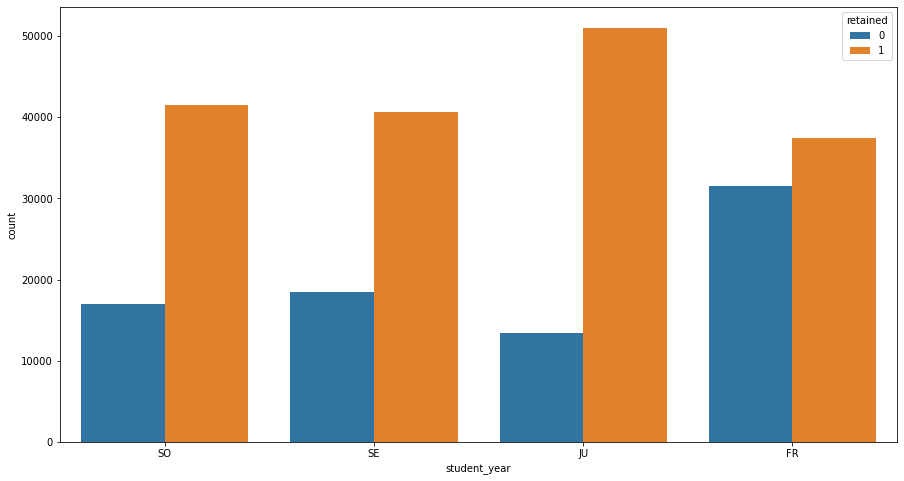

student_year  retained
JU            1           0.792277
SO            1           0.710127
SE            1           0.687837
FR            1           0.543561
              0           0.456439
SE            0           0.312163
SO            0           0.289873
JU            0           0.207723
Name: retained, dtype: float64


enroll_type

--------------------------------------------------------------
retained  enroll_type
1         TRANSFER       88601
          FIRST          81261
0         TRANSFER       41579
          FIRST          38283
1         CONC             814
0         CONC             389
Name: enroll_type, dtype: int64


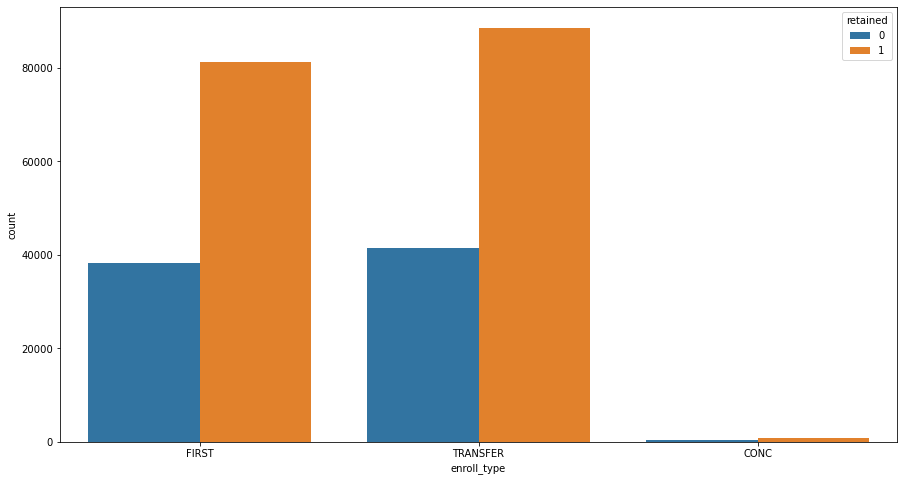

enroll_type  retained
TRANSFER     1           0.680604
FIRST        1           0.679758
CONC         1           0.676642
             0           0.323358
FIRST        0           0.320242
TRANSFER     0           0.319396
Name: retained, dtype: float64


cip

--------------------------------------------------------------
retained  cip
1         52     32754
          24     17167
0         52     14512
          24     13055
1         50     11701
          42     11294
          26     10455
          43      8596
          23      7245
          30      6854
          15      6846
          13      6741
          51      6489
          44      5969
          31      5872
          45      5086
0         50      5040
          26      4927
          42      4584
1         49      4421
          11      4342
0         13      4117
1         54      3887
0         43      3811
1         9       3735
          3       3162
          40      3155
0         15      3151
          23   

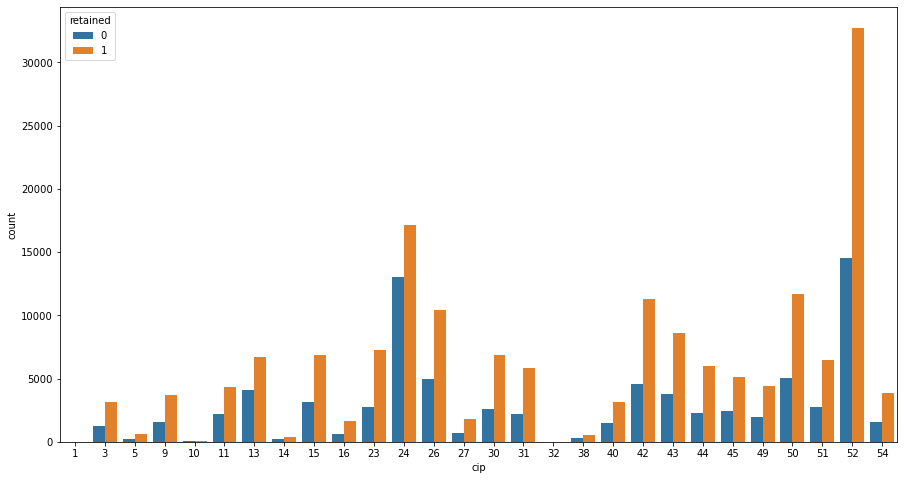

cip  retained
32   0           1.000000
1    0           0.727273
30   1           0.727215
44   1           0.726332
5    1           0.725926
31   1           0.724044
23   1           0.723776
3    1           0.719618
54   1           0.716366
27   1           0.715326
16   1           0.713401
42   1           0.711299
51   1           0.704637
9    1           0.703390
50   1           0.698943
49   1           0.696001
52   1           0.692972
43   1           0.692835
15   1           0.684805
40   1           0.683492
26   1           0.679691
45   1           0.672751
11   1           0.663813
14   1           0.657993
10   1           0.645161
38   1           0.633252
13   1           0.620833
24   1           0.568030
     0           0.431970
13   0           0.379167
38   0           0.366748
10   0           0.354839
14   0           0.342007
11   0           0.336187
45   0           0.327249
26   0           0.320309
40   0           0.316508
15   0           0.31519

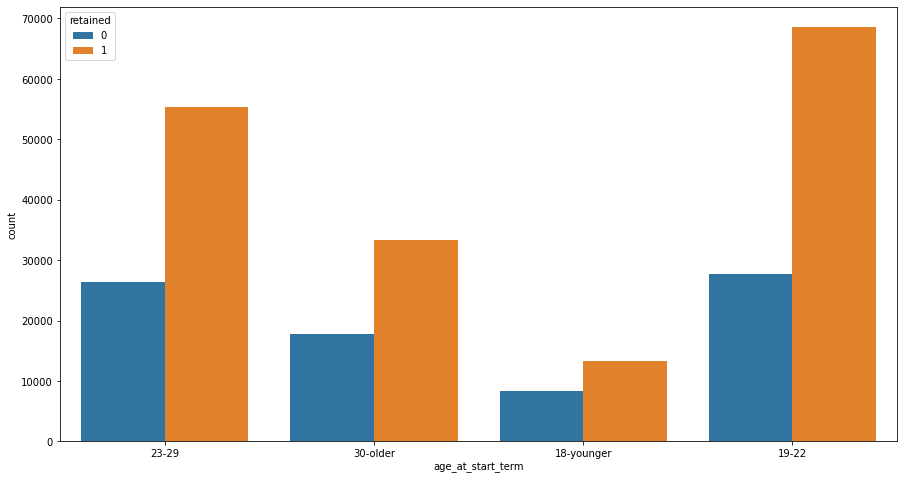

age_at_start_term  retained
19-22              1           0.711866
23-29              1           0.677957
30-older           1           0.652306
18-younger         1           0.613940
                   0           0.386060
30-older           0           0.347694
23-29              0           0.322043
19-22              0           0.288134
Name: retained, dtype: float64


act

--------------------------------------------------------------
retained  act       
1         NADA          88088
          20 or more    49167
0         NADA          45088
1         Under 20      33421
0         20 or more    20073
          Under 20      15090
Name: act, dtype: int64


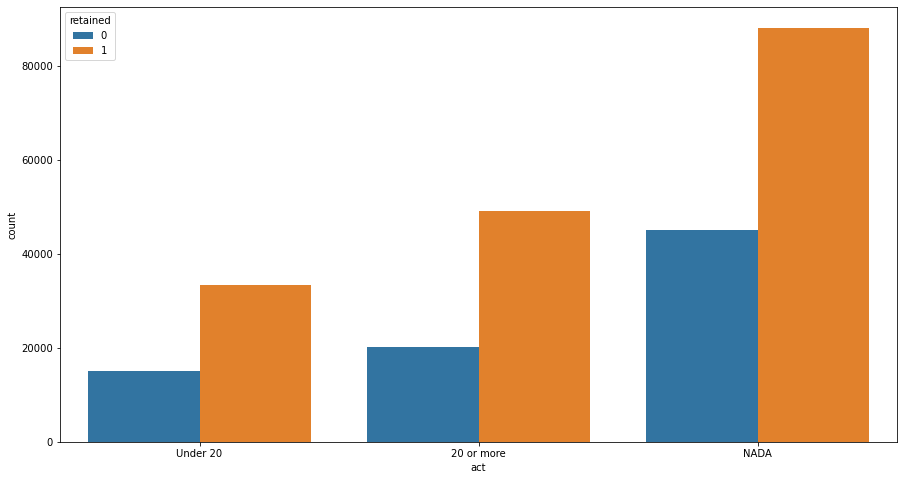

act         retained
20 or more  1           0.710095
Under 20    1           0.688937
NADA        1           0.661440
            0           0.338560
Under 20    0           0.311063
20 or more  0           0.289905
Name: retained, dtype: float64


depend_status

--------------------------------------------------------------
retained  depend_status
1         IND              64385
          DEP              59744
          unk              46547
0         IND              29746
          DEP              25340
          unk              25165
Name: depend_status, dtype: int64


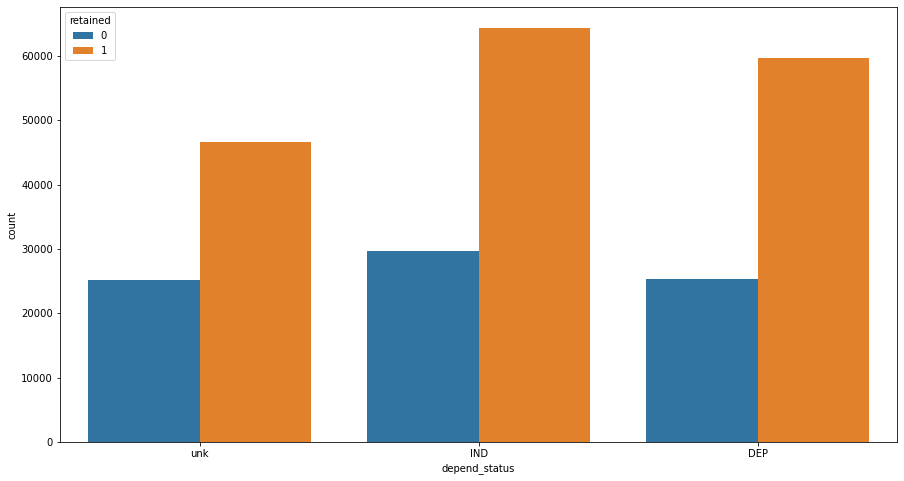

depend_status  retained
DEP            1           0.702177
IND            1           0.683994
unk            1           0.649082
               0           0.350918
IND            0           0.316006
DEP            0           0.297823
Name: retained, dtype: float64


yrs_since_start

--------------------------------------------------------------
retained  yrs_since_start
1         1                  43864
          0                  41738
          2                  30128
0         0                  26102
          1                  19866
1         3                  19323
          6 or more          16927
          4                  11799
0         2                  10276
          6 or more           9892
1         5                   6897
0         3                   6336
          4                   4525
          5                   3254
Name: yrs_since_start, dtype: int64


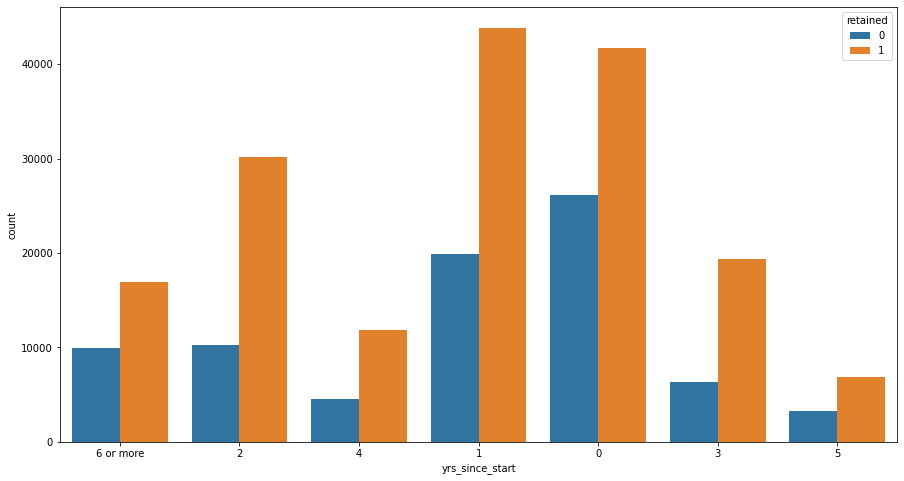

yrs_since_start  retained
3                1           0.753069
2                1           0.745669
4                1           0.722801
1                1           0.688279
5                1           0.679440
6 or more        1           0.631157
0                1           0.615242
                 0           0.384758
6 or more        0           0.368843
5                0           0.320560
1                0           0.311721
4                0           0.277199
2                0           0.254331
3                0           0.246931
Name: retained, dtype: float64


title

--------------------------------------------------------------
retained  title                                                                           
1         business,_management,_marketing,_and_related_support_services                       32754
          liberal_arts_and_sciences,_general_studies_and_humanities                           17167
0         business,_management,_marketing,_and_r

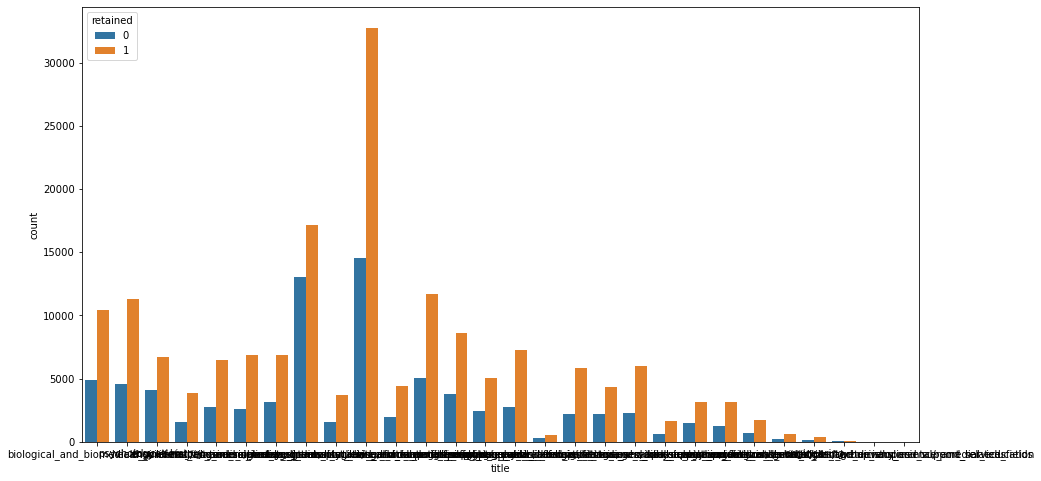

title                                                                             retained
basic_skills_and_developmental/remedial_education                                 0           1.000000
agricultural/animal/plant/veterinary_science_and_related_fields                   0           0.727273
multi/interdisciplinary_studies                                                   1           0.727215
public_administration_and_social_service_professions                              1           0.726332
area,_ethnic,_cultural,_gender,_and_group_studies                                 1           0.725926
parks,_recreation,_leisure,_fitness,_and_kinesiology                              1           0.724044
english_language_and_literature/letters                                           1           0.723776
natural_resources_and_conservation                                                1           0.719618
history                                                                           1  

In [35]:
columns = train.columns[train.dtypes == 'object']
for col in columns:
    plt.figure(figsize=(15,8))
    print(f'{col}\n\n--------------------------------------------------------------')
    print(f'{train.groupby("retained")[col].value_counts().sort_values(ascending=False)}')
    sns.countplot(train[col], hue=train['retained'])
    plt.show()
    print(f'{train.groupby(col)["retained"].value_counts(normalize=True).sort_values(ascending=False)}')
    print(f'=======================================================\n\n')

In [ ]:
columns = train.columns[(train.dtypes == 'int') | (train.dtypes == 'float') | (train.dtypes == 'uint8')]
# print(f'Not Retained:\n\n')
# print(f'{train[train["retained"]=="N"].describe()}\n')
# print(f'Retained:\n\n')
# print(f'{train[train["retained"]=="Y"].describe()}\n')
for col in columns:
    print(f'{col}\n\n--------------------------------------------------------------')
    sns.barplot(x=col, y='retained', data= train)
    plt.show()
    print(f'=======================================================\n\n')

id

--------------------------------------------------------------


In [ ]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)

In [ ]:
# # Perform a Pearson Correlation on the dataset
plt.figure(figsize=(4,20))
correlate = train.corr()
# Plot the Correlation on a heatmap
sns.heatmap(correlate.loc[['retained']].T, annot=True, cmap='coolwarm')
plt.show()

- slight correlation between enrolled_between, term_gpa, academic standing. with a slight negative correlation to freshman status

In [ ]:
plt.figure(figsize=(15,8))
sns.relplot(x='term_gpa',y='reg_before_start',data=train,col='retained',row='title',height=10)
plt.show()

## Bivariate Summary: 

- race_ethn: mostly white/hispanic population
- fgen: mostly first generation with little difference in retention
- year: negative correlation between class year and population size. Juniors had the highest retention rate. 
- enroll_type: most students were first time college students out of high school. Did not show much difference in retention between different types.
- cip: 52, 24 had highest population, 42,43,50,26 followed with next biggest group. (POSSIBLE CLUSTERS) Out of big groups 24 showed the lowest retention rate.
- age: 19-22 by far the largest population. 18 and under had lowest retention(did they transfer?)
- yr_since_start: 0 had lowest retention, 1 and 6 or more had next lowest, 5, 2, 4, 3 (EXPLORE IN MULTI)

Following showed low retention stutus
- w_count
- communication major
- computer information systems
- engineering
- liberal arts
- philosophy and religious studies
- 18 or younger
- 23 to 29
- act_NADA
- depend_status_IND
-yrs_since_start_0
-yrs_since_start_1



## Questions

### Question 1: How did area of study affect retention?

In [ ]:
ax = sns.catplot(x='retained',col='cip',col_wrap=9,data=train,kind='count')
ax.set_xticklabels(rotation=90)

#### Chi Sqaured Hypothesis Test

- $H_o$: Area of study is independent of whether or not someone is retained.
- $H_α$: Area of study is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.title , train.retained)
contingency_table

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject the null hypothesis.

### Question 1 Summary: Out of the areas of study that had retention rates below the mean overall retention rate liberal_arts, visual_and_performing_arts and engineering had the biggest portions of the population. Using a Chi^2 test we that retention has a statistically significant association with area of study.

#### Attempts were made Q1

In [ ]:
def get_below_avg_retention():
    # Count of instances of study catagory
    count = list(train.title.value_counts().sort_index().values)
    # Percent of each area of study to the whole
    percent = [round(num, 4) for num in list(train.title.value_counts(normalize=True).sort_index().values)]
    # Percent of retained in each area of study
    percent_retained = list(train[['retained','title']].groupby('title').mean().round(4).retained.values)
    # Percent not retained in each area of study
    percent_not_retained = [round(num , 4) for num in list(1 - train[['retained','title']].groupby('title').mean().sort_index().retained.values)]
    # Mean retention rate of all instances
    overall_mean_retention = train.retained.mean()
    # Variable names for df assignment
    columns = list(train.title.sort_values().unique())
    # Create Df
    study_df = pd.DataFrame([count, percent, percent_retained, percent_not_retained] , index = ['count','percent','percent_retained','percent_not_retained'] ,columns = columns).T.reset_index()
    # Show areas of study with less retention than the average and sort by not retained
    df_q1 = study_df[study_df['percent_retained'] < overall_mean_retention].sort_values(by='percent_not_retained',ascending=False)
    # return df
    return df_q1

In [ ]:
df_q1 = get_below_avg_retention()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='index',y ='percent',data=df_q1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Percent',fontsize=20)
plt.xlabel('Major', fontsize=20)
plt.show()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='index',y ='percent_not_retained',data=df_q1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Percent Not Retained',fontsize=20)
plt.xlabel('Major', fontsize=20)
plt.show()

In [ ]:
# Count of full dataset
len(train)

- 78848

In [ ]:
# Individual count of retention
train.retained.value_counts()

- 1: 55277
- 0: 23571

In [ ]:
# Count of all retained values
train.retained.value_counts().sum()

- 78848

In [ ]:
# value counts of titles
train.title.value_counts().sort_index()

In [ ]:
# Sum of value counts of titles
train.title.value_counts().sum()

- 78848

In [ ]:
# Value Counts of not retained titles
train[train['retained'] == 0]['title'].value_counts().sort_index()

In [ ]:
# Sum of value counts of not retained titles
train[train['retained'] == 0]['title'].value_counts().sort_index().sum()

- 23571

In [ ]:
# Value Counts of retained titles
train[train['retained'] == 1]['title'].value_counts().sort_index()

In [ ]:
# Summ of value counts of retained titles
train[train['retained'] == 1]['title'].value_counts().sort_index().sum()

- 55277

In [ ]:
# Value Counts of all titles
train[['retained','title']]['title'].value_counts().sort_index()

In [ ]:
# Sum of value counts of all titles
train[['retained','title']]['title'].value_counts().sort_index().sum()

- 78848

In [ ]:
ax = sns.scatterplot(x='index',y='percent_not_retained',data=study_df)
ax.set_xticklabels(study_df['index'], rotation=90)
plt.show()

In [ ]:
# Assign figure size
plt.figure(figsize=(12,7))
# Use Squarify to create a tree map of segment counts
squarify.plot(sizes=cip_df['count'], 
              label=cip_df['index'],
              value=cip_df['percent'],
              color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan'],
              text_kwargs={'fontsize': 17})
# Assign titles
plt.title('CIP by Count', fontsize=27)
plt.axis('off')
plt.show()

In [ ]:
# Assign figure size
plt.figure(figsize=(12,7))
# Use Squarify to create a tree map of segment counts
squarify.plot(sizes=df['count'], 
              label=df['index'],
              value=df['percent_not_retained'],
              color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan'],
              text_kwargs={'fontsize': 17})
# Assign titles
plt.title('CIP by Count', fontsize=27)
plt.axis('off')
plt.show()

In [ ]:
# Count of instances of study catagory
count = list(train.cip.value_counts().sort_index().values)
# Percent of each area of study to the whole
percent = [round(num, 4) for num in list(train.cip.value_counts(normalize=True).sort_index().values)]
# Percent of retained in each area of study
percent_retained = list(train[['retained','cip']].groupby('cip').mean().round(4).retained.values)
# Percent not retained in each area of study
percent_not_retained = [round(num , 4) for num in list(1 - train[['retained','cip']].groupby('cip').mean().sort_index().retained.values)]
# Mean retention rate of all instances
overall_mean_retention = train.retained.mean()
# Variable names for df assignment
cip_columns = list(train.cip.sort_values().unique())
# Create Df
cip_study_df = pd.DataFrame([count, percent, percent_retained, percent_not_retained] , index = ['count','percent','percent_retained','percent_not_retained'] ,columns = cip_columns).T.reset_index()
# Show areas of study with less retention than the average and sort by not retained
cip_df = study_df[study_df['percent_retained'] < overall_mean_retention].sort_values(by='percent_not_retained',ascending=False)
# study_df

In [ ]:
# Percent not retained
train[train['retained'] == 0]['title'].value_counts().sort_index() / train[['retained','title']]['title'].value_counts().sort_index()

In [ ]:
# Percent retained
train[train['retained'] == 1]['title'].value_counts().sort_index() / train[['retained','title']]['title'].value_counts().sort_index()

### Question 2: Does a students age combined with area of study affect retention?

In [ ]:
ax = sns.catplot(x='age_at_start_term',col='cip',col_wrap=9,data=train,kind='count',hue='retained',height=5, aspect=.8)
ax.set_xticklabels(rotation=90)
plt.show()

In [ ]:
train[['cip','age_at_start_term','retained']].value_counts(normalize=True).sort_index()

In [ ]:
cip = wrangle.get_cip_codes()
cip.sort_values(by='cip',ascending=False)

In [ ]:
age_cip_percent = train[['cip','age_at_start_term','retained']].groupby(['cip','age_at_start_term']).mean()
age_cip_percent = age_cip_percent.reset_index()
age_cip_percent = age_cip_percent[age_cip_percent['retained'] != 0]
age_cip_percent.sort_values(by='retained',ascending=False)

In [ ]:
train[['cip','age_at_start_term','retained']].value_counts()

In [ ]:
sns.set_style("darkgrid")
sns.relplot( x='cip', y='retained', data=age_cip_percent, col='age_at_start_term', col_wrap=2, kind='line',height=10)
plt.show()

### Question 2 Summary: There doesn't seem to be anthing of note here. Most students are 19-22 and are in cip 52 and 24. Further exploration into this main group should be done to see if there are notable aspects that drive retention in this bigger group.

#### Attempts were made Q2

In [ ]:
# from matplotlib.cm import get_cmap
# from matplotlib.patches import Patch

# df = train[['title','age_at_start_term','retained']]

# # This is now what I'd like to plot
# grouped = df.groupby(by=['title','age_at_start_term','retained']).count().unstack()

# # List of retained, to use later as categories in subplots
# kinds = grouped.columns.levels[1]

# # colors for bar graph
# colors = [get_cmap('viridis')(v) for v in np.linspace(0,1,len(kinds))]

# sns.set(context="talk")
# nxplots = len(grouped.index.levels[0])
# nyplots = len(grouped.index.levels[1])
# fig, axes = plt.subplots(nxplots,
#                          nyplots,
#                          sharey=True,
#                          sharex=True,
#                          figsize=(10,12))

# fig.suptitle('Title, Age, and Retention')

# # plot the data
# for a, b in enumerate(grouped.index.levels[0]):
#     for i, j in enumerate(grouped.index.levels[1]):
#         axes[a,i].bar(kinds,grouped.loc[b,j],color=colors)
#         axes[a,i].xaxis.set_ticks([])

# axeslabels = fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.grid(False)
# axeslabels.set_ylabel('Title',rotation='horizontal',y=1,weight="bold")
# axeslabels.set_xlabel('Age',weight="bold")

# # x- and y-axis labels
# for i, j in enumerate(grouped.index.levels[1]):
#     axes[nyplots,i].set_xlabel(j)
# for i, j in enumerate(grouped.index.levels[0]):
#     axes[i,0].set_ylabel(j)

# # Tune this manually to make room for the legend
# fig.subplots_adjust(right=0.82)

# fig.legend([Patch(facecolor = i) for i in colors],
#            kinds,
#            title="Retention",
#            loc="center right")


In [ ]:
g = sns.FacetGrid(train, col='age_at_start_term',row='cip',height=10)
g.map(sns.histplot, 'retained')

### Question 3: How did the number of years since the student start affect retention?

In [ ]:
# Value of year since start instances with retention counts
train[['yrs_since_start','retained']].value_counts().sort_index()

In [ ]:
# Percent of not retained per year instance
yrs_percent = train[['yrs_since_start','retained']].groupby('yrs_since_start').mean()
yrs_percent

In [ ]:
sns.barplot(x=yrs_percent.index,y='retained',data=yrs_percent)

#### Chi Sqaured Hypothesis Test

- $H_o$: yrs_since_start is independent of whether or not someone is retained.
- $H_α$: yrs_since_start is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.yrs_since_start, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject null hypothesis

### Question 3 Summary: Running a chi^2 hypothesis test we see that yrs_since_start is not independent from retention. In the graph above we see that retention is lowest at yr 0 and it rises till yr 3 which seems to be our highest retention. Retention then starts to fall as the years continue past 3. 

### Question 4: Does the students class status (Freshman, Sophmore,etc..) vs the years since a student started affect retention?

In [ ]:
train[['student_year','yrs_since_start','retained']].value_counts(normalize=True)

In [ ]:
class_and_yr = train[['student_year','yrs_since_start','retained']].groupby(['student_year','yrs_since_start']).mean().reset_index()


class_and_yr['student_year'] = class_and_yr.student_year.str.replace('FR','1 - Freshman').str.replace('SO','2 - Sophomore').str.replace('JU','3 - Junior').str.replace('SE','4 - Senior')


class_and_yr = class_and_yr.sort_values(by='student_year')

In [ ]:
ax = sns.catplot(x="yrs_since_start", y="retained", col="student_year",
                data=class_and_yr, height = 8,
                kind="bar", aspect=.6)

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["0", "1", "2", "3", "4", "5", "6+"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

### Question 4 Summary: Freshman by far have the lowest retention across the yrs. Juniors and Seniors have the highest. Further exploration could be done with enrollment type to see how first time students compare to transfer students. As well populations can be seperated by full time and part time status. 

### Question 5: Does a students full time or part time status affect retention?

In [ ]:
train[['time_status','retained']].value_counts(normalize=True)

In [ ]:
sns.countplot(x = 'time_status',data=train,hue='retained')

#### Chi Sqaured Hypothesis Test

- $H_o$: time_status is independent of whether or not someone is retained.
- $H_α$: time_status is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.time_status, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject the null.

### Question 5 Summary: It does look as though full time students are more likely to be retained. The chi^2 test does show that there is a statistically significant relationship between time_status and retention.

### Question 6: Does the students full time / part time status combined with the students dependent status affect retention?

In [ ]:
train.depend_status.value_counts(),\
train.depend_status.value_counts(normalize=True),\
train.time_status.value_counts(),\
train.time_status.value_counts(normalize=True),\
train[['time_status','depend_status']].value_counts(),\
train[['time_status','depend_status']].value_counts(normalize=True),\
train[['time_status','depend_status','retained']].value_counts(),\
train[['time_status','depend_status','retained']].value_counts(normalize=True)

In [ ]:
ax = sns.catplot(x="time_status",
                 y="retained", 
                 col="depend_status",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["Part time", "Full time"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('time_status')
plt.show()

In [ ]:
ax = sns.catplot(x='time_status',
                 hue='retained',
                 col='depend_status',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["Part time", "Full time"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 6 Summary: There does not look to be a significant difference in retention for full time students between each dependent status. Independent students had a 5 percent higher retention rate to part time dependent status.

### Question 7: Does the students w_count affect retention?

In [ ]:
train.retained.mean(),\
train[train['w_count'] == 1].retained.mean(),\
train[train['w_count'] == 0].retained.mean(),\
train.w_count.value_counts(),\
train.w_count.value_counts(normalize=True),\
train[['w_count','retained']].value_counts(),\
train[['w_count','retained']].value_counts(normalize=True)

In [ ]:
ax = sns.catplot(x='w_count',
              hue='retained',
              data=train,
              kind='count',
              height=8)

(ax.set_xticklabels(["No Withdraws", "Withdraws"]))  

plt.show()

In [ ]:
ax = sns.catplot(x="w_count",
                 y="retained", 
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_xticklabels(["No Withdraws", "Withdraws"]))  

plt.show()

#### Chi Sqaured Hypothesis Test

- $H_o$: w_count is independent of whether or not someone is retained.
- $H_α$: w_count is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.time_status, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject the null hypothesis.

### Question 7 Summary: 70 percent of students did not have a w_count in the base semester of the retention calculation, out of those students the retention rate was higher than the average. The 30 percent of students with at least one withdraw had a much lower retention rate of 55 percent.

### Question 8: Does the students financial aid status and pell_grant status affect retention?

In [ ]:
train[['pell_ever']].value_counts(),\
train[['pell_ever']].value_counts(normalize=True),\
train[['fa_recd']].value_counts(),\
train[['fa_recd']].value_counts(normalize=True),\
train[['pell_ever','fa_recd']].value_counts(),\
train[['pell_ever','fa_recd']].value_counts(normalize=True),\
train[['pell_ever','fa_recd','retained']].value_counts(),\
train[['pell_ever','fa_recd','retained']].value_counts(normalize=True)

In [ ]:
ax = sns.catplot(x="fa_recd",
                 y="retained", 
                 col="pell_ever",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["No Financial Aid", "Financial Aid"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('time_status')
plt.show()

In [ ]:
ax = sns.catplot(x='fa_recd',
                 hue='retained',
                 col='pell_ever',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["No Financial Aid", "Financial Aid"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 8 Summary: Students who recieved financial aid were more likely to be retained whether they had ever been pell eligible before or not. Out of those that had not received financial aid the retention rate was almost the same but those that had never been pell eligible had a slightly higher retention rate.

### Question 9: How does a students expected family contribution affect retention?

In [ ]:
train[['efc','retained']].groupby('retained').mean()

In [ ]:
efc_nonzero = train[train['efc'] != 0][['efc','retained']]
efc_nonzero['efc_bin'] = pd.qcut(train.efc, 4, labels =['lowest','low','high','highest'])
efc_nonzero.groupby('efc_bin').mean()

In [ ]:
# boxplot efc by retention
sns.relplot(x='retained',y='efc',kind='line',data= efc_nonzero)
plt.show()

In [ ]:
efc_zero = train[train['efc'] == 0][['efc','retained']]
efc_zero.retained.mean()

In [ ]:
# boxplot efc by retention
sns.countplot(x='retained',data= efc_zero)

### Question 9 Summary: Almost 25 percent of students had no expected family contribution recorded. Out of those that did the bottom 25 % had a average retention rate that was 3.5 percent lower than the top 25 %. Those with no efc values had a 6.6 percent lower efc than the top 25 percent.

##### Attemps were made: Q8

In [ ]:
len(train),\
len(train[train.efc != 0]),\
len(train[train.efc != 0]) / len(train),\
len(train[train.efc == 0]),\
len(train[train.efc == 0]) / len(train),\
len(train[train.efc > 100_000]),\
len(train[train.efc > 100_000]) / len(train),\
len(train[train.efc > 50_000]),\
len(train[train.efc > 50_000]) / len(train),\
len(train[train.efc > 5_000]),\
len(train[train.efc > 5_000]) / len(train)

In [ ]:
efc[efc['efc_bin'] == 'lowest'].describe(),\
efc[efc['efc_bin'] == 'low'].describe(),\
efc[efc['efc_bin'] == 'high'].describe(),\
efc[efc['efc_bin'] == 'highest'].describe(),\
len(efc[efc['efc']==999999]),\
efc['efc'].value_counts().index.max()

### Question 10: Does a students term gpa or hs gpa affect retention?

In [ ]:
train[['retained','hs_gpa','term_gpa']].groupby('retained').mean()

In [ ]:
sns.catplot(x='retained',y='hs_gpa',data = train, kind ='box')

In [ ]:
sns.catplot(x='retained',y='term_gpa',data = train, kind ='box')

#### Independent T-Test(1-tail,2-sample) Hypothesis test

- $H_o$: Those who are not retained have the same term_gpa as those who are retained.
- $H_α$: Those who are not retained have a lower term_gpa than those who are retained

In [ ]:
retained = train[train.retained == 1].term_gpa
retained.hist()

In [ ]:
retained.mean(),\
len(retained),\
(retained == 0).mean()

In [ ]:
not_retained = train[train.retained == 0].term_gpa
not_retained.hist()

In [ ]:
not_retained.mean(),\
len(not_retained),\
(not_retained == 0).mean()

In [ ]:
retained.var(),\
not_retained.var()

In [ ]:
α = 0.05

In [ ]:
t, p = stats.ttest_ind(not_retained, retained, equal_var=False)
t, p

In [ ]:
if p/2 > α:
    print('We fail to reject the null')
elif t < 0:
    print('We fail to reject the null')
else:
    print('We reject the null')

- According to the T-test we do not reject the null which goes against what I would think. This should be revisted and checked for validity. Sample are not really normal. The retained sample has 2 % zero values while the not retained has almost 25 % zero values. Variance is not equal so it was run as a welch's t-test. 

In [ ]:
len(train[train.term_gpa == 0]) / len(train),\
train[train.term_gpa == 0].retained.mean(),\
train[train.term_gpa == 0].term_gpa.mean(),\
len(train[train.term_gpa < 0.5]) / len(train),\
train[train.term_gpa < 0.5].retained.mean(),\
train[train.term_gpa < 0.5].term_gpa.mean(),\
len(train[(train.retained == 0) & (train.term_gpa != 0)]) / len(train),\
train[(train.retained == 0) & (train.term_gpa != 0)].retained.mean(),\
train[(train.retained == 0) & (train.term_gpa != 0)].term_gpa.mean(),\
train.term_gpa.mean(),\
train.hs_gpa.mean()

### Question 10 Summary: Term gpa seems to be a better predictor than hs_gpa. Bottom 75 % of students in the not retained category had a term_gpa less than the bottom 50 % of those retained. Also note for later analysis hs_gpa does not change with a student over time but term_gpa does. Hs_gpa variables could be skewed because of repeats for each semester a student takes, while term_gpa changes semester to semester. 

### Question 11: Does enrollment type and yrs_since_start affect retention?

In [ ]:
train[['enroll_type','retained']].value_counts(), train[['enroll_type','retained']].value_counts(normalize=True)

In [ ]:
train.groupby('enroll_type').retained.mean()

In [ ]:
train.groupby('yrs_since_start').retained.mean()

In [ ]:
train.groupby(['enroll_type','yrs_since_start']).retained.mean().sort_index()

In [ ]:
ax = sns.catplot(x="yrs_since_start",
                 y="retained", 
                 col="enroll_type",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["0","1","2","3","4","5","6+"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('enroll_type')
plt.show()

In [ ]:
ax = sns.catplot(x='yrs_since_start',
                 hue='retained',
                 col='enroll_type',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["0","1","2","3","4","5","6+"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 11 Summary: It does look as though overall students in their first year have the lowest retention across the board. Concurant students seem to have a peak in retetention around year 4, Transfer students seem to have a peak around year 2 and first term students seem to have a peak around year 3. First term students make up over 3/4 of the population so. it seems the trend in first term students is closer to what is seen over the overall population.

### Question 12: Does whether a student was enrolled between the retention semester affect retention?

In [ ]:
train.enrolled_between.value_counts()

In [ ]:
train.groupby('enrolled_between').retained.mean()

In [ ]:
sns.countplot(x='enrolled_between',hue='retained',data=train)

In [ ]:
sns.catplot(x='enrolled_between',y='retained',data=train, kind='bar')

### Question 12 Summary: If a student was not enrolled between the retention semester it seems to be the biggest indicator that they will not be retained.


# Initial EDA Summary:

# Questions Summary:

Question 1: How did area of study affect retention?
- Q1: Out of the areas of study that had retention rates below the mean overall retention rate liberal_arts, visual_and_performing_arts and engineering had the biggest portions of the population. Using a Chi^2 test we that retention has a statistically significant association with area of study.

Question 2: Does a students age combined with area of study affect retention?
- Q2: There doesn't seem to be anthing of note here. Most students are 19-22 and are in cip 52 and 24. Further exploration into this main group should be done to see if there are notable aspects that drive retention in this bigger group.

Question 3: How did the number of years since the student start affect retention?
- Q3: Running a chi^2 hypothesis test we see that yrs_since_start is not independent from retention. In the graph above we see that retention is highest at yr 0 and it drop till yr 3 which seems to be our lowest retention. Retention then starts to rise the years continue past 3.

Question 4: Does the students class status (Freshman, Sophmore,etc..) vs the years since a student started affect retention?
- Q4: Freshman by far have the lowest retention across the yrs. Juniors and Seniors have the highest. Further exploration could be done with enrollment type to see how first time students compare to transfer students. As well populations can be seperated by full time and part time status. 

Question 5: Does a students full time or part time status affect retention?
- Q5: It does look as though full time students are more likely to be retained. The chi^2 test does show that there is a statistically significant relationship between time_status and retention.

Question 6: Does the students full time / part time status combined with the students dependent status affect retention?
- Q6: There does not look to be a significant difference in retention for full time students between each dependent status. Independent students had a 5 percent higher retention rate to part time dependent status.

Question 7: Does the students w_count affect retention?
- Q7: 70 percent of students did not have a w_count in the base semester of the retention calculation, out of those students the retention rate was higher than the average. The 30 percent of students with at least one withdraw had a much lower retention rate of 55 percent.

Question 8: Does the students financial aid status and pell_grant status affect retention?
- Q8: Students who recieved financial aid were more likely to be retained whether they had ever been pell eligible before or not. Out of those that had not received financial aid the retention rate was almost the same but those that had never been pell eligible had a slightly higher retention rate.

Question 9: How does a students expected family contribution affect retention?
- Q9: Almost 25 percent of students had no expected family contribution recorded. Out of those that did the bottom 25 % had a average retention rate that was 3.5 percent lower than the top 25 %. Those with no efc values had a 6.6 percent lower efc than the top 25 percent.

Question 10: Does a students term gpa or hs gpa affect retention?
- Q10: Term gpa seems to be a better predictor than hs_gpa. Bottom 75 % of students in the not retained category had a term_gpa less than the bottom 50 % of those retained. Also note for later analysis hs_gpa does not change with a student over time but term_gpa does. Hs_gpa variables could be skewed because of repeats for each semester a student takes, while term_gpa changes semester to semester. 

Question 11: Does enrollment type affect retention?
- Q11: It does look as though overall students in their first year have the lowest retention across the board. Concurant students seem to have a peak in retetention around year 4, Transfer students seem to have a peak around year 2 and first term students seem to have a peak around year 3. First term students make up over 3/4 of the population so. it seems the trend in first term students is closer to what is seen over the overall population.

Question 12: Does whether a student was enrolled between the retention semester affect retention?
- Q12: If a student was not enrolled between the retention semester it seems to be the biggest indicator that they will not be retained.